In [82]:
import json
import requests
from dotenv import load_dotenv
import os
import matplotlib.pyplot as plt


Fontconfig warning: ignoring UTF-8: not a valid region tag
Matplotlib is building the font cache; this may take a moment.


In [28]:
load_dotenv()  # Load environment variables from .env
API_KEY = os.getenv("GOOGLE_API_KEY")

In [32]:
import google.generativeai as genai

load_dotenv("key.env")  # Load environment variables from .env
API_KEY = os.getenv("GOOGLE_API_KEY")

genai.configure(api_key=API_KEY)
model = genai.GenerativeModel("gemini-1.5-flash-8b")
#response = model.generate_content("Explain how AI works")
#print(response.text)


In [42]:
functions_folder = "generated_outputs"

In [43]:
def evaluate_readability(function_code):
    prompt = f"Evaluate the readability of the following code on a scale of 1-5 (1: bad, 5: good):\n\n{function_code}\n\nOnly return a number from 1-5. Readability score:"
    response = model.generate_content(prompt)
    try:
        score = int(response.text.strip())
        if score < 1 or score > 5:
            raise ValueError(f"Invalid score: {score}")
        return score
    except ValueError:
        print(f"Failed to parse readability score for:\n{function_code}")
        return None

In [74]:
readability_scores = []


txt_files = [os.path.join(functions_folder, f"lc{i}.txt") for i in range(1, 11)]


for idx, file_path in enumerate(txt_files):
    with open(file_path, "r") as f:
        function_code = f.read()
    
    score = evaluate_readability(function_code)
    if score is not None:
        readability_scores.append({"file_name": os.path.basename(file_path), "readability_score": score})

In [75]:
temp_readability = []

txt_files = [os.path.join(functions_folder, f"lc{i}.txt") for i in range(11, 21)]


for idx, file_path in enumerate(txt_files):
    with open(file_path, "r") as f:
        function_code = f.read()
    
    score = evaluate_readability(function_code)
    if score is not None:
        temp_readability.append({"file_name": os.path.basename(file_path), "readability_score": score})


readability_scores = readability_scores + temp_readability

In [76]:
temp_readability = []

txt_files = [os.path.join(functions_folder, f"lc{i}.txt") for i in range(21, 31)]


for idx, file_path in enumerate(txt_files):
    with open(file_path, "r") as f:
        function_code = f.read()
    
    score = evaluate_readability(function_code)
    if score is not None:
        temp_readability.append({"file_name": os.path.basename(file_path), "readability_score": score})

readability_scores = readability_scores + temp_readability

In [77]:
temp_readability = []

txt_files = [os.path.join(functions_folder, f"lc{i}.txt") for i in range(31, 41)]


for idx, file_path in enumerate(txt_files):
    with open(file_path, "r") as f:
        function_code = f.read()
    
    score = evaluate_readability(function_code)
    if score is not None:
        temp_readability.append({"file_name": os.path.basename(file_path), "readability_score": score})

readability_scores = readability_scores + temp_readability

In [78]:
temp_readability = []

txt_files = [os.path.join(functions_folder, f"lc{i}.txt") for i in range(41, 51)]


for idx, file_path in enumerate(txt_files):
    with open(file_path, "r") as f:
        function_code = f.read()
    
    score = evaluate_readability(function_code)
    if score is not None:
        temp_readability.append({"file_name": os.path.basename(file_path), "readability_score": score})


readability_scores = readability_scores + temp_readability

In [79]:
results_file = "readability_scores.json"
with open(results_file, "w") as f:
    json.dump(readability_scores, f, indent=4)

print(f"Readability scores saved to {results_file}")

Readability scores saved to readability_scores.json


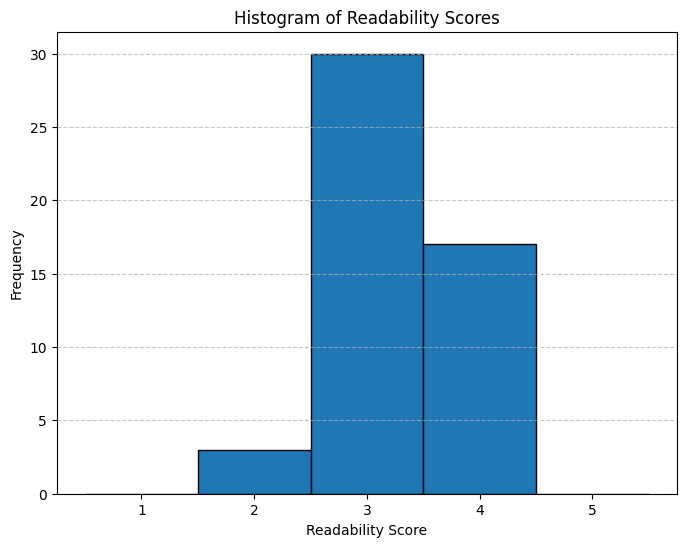

In [83]:
json_file = "readability_scores.json"

with open(json_file, "r") as f:
    data = json.load(f)

scores = [entry["readability_score"] for entry in data]

plt.figure(figsize=(8, 6))
plt.hist(scores, bins=range(1, 7), edgecolor="black", align="left")  # Bins from 1 to 5
plt.xticks(range(1, 6))
plt.title("Histogram of Readability Scores Generated by Gemini-1.5-flash-8b")
plt.xlabel("Readability Score")
plt.ylabel("Frequency")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()